# 기본 구성

- 텐서플로우는 1.x, 2.x 버전으로 구성
  - 현재는 과도기 적으로 양쪽 버전이 존재
  - 1.x 버전으로 진행하고 차후 2.x 로 컨버전 진행

# 기본 모듈 가져오기

In [5]:
!pip list

# 기본적으로 코랩은 텐서플로우 2.x버전으로 지원(2021년도부터)
# 1.x를 사용하기 위해서는 매직코드를 통해서 1.x사용을 지정해야 한다

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   20.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
backports.tempfile            1.0
backports.weakref             1.0.post1
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca    

In [6]:
%tensorflow_version 1.x

In [7]:
import tensorflow as tf

In [8]:
# 버전
tf.__version__

'1.15.2'

# Define And Run 방식

- 2개 파트로 나눠서 작성
- Part1 (설계)
  - 데이터가 흘러가는 플로우를 구성하는 파트
  - 네트워크 구성하는 파트
  - 인공신경망을 만드는 파트
  - 파이썬으로 구성
  - 실제로는 전혀 연산을 수행하지 않는다

- Part2 (수행, 학습)
  - 실제 데이터를 주입한다
  - 실제로 학습을 수행시킨다 -> C++ -> 빠르다
  - 세션을 구해서 수행시킨다
  - 절차
    - 세션 오픈
    - 데이터 주입
    - 수행(C++) -> GPU 사용할수 있다
    - 결과를 돌려 받는다(파이썬)
    - 세션 닫는다

# 텐서플로우를 구성하는 기본 요소

## 텐서

- 연산, 데이터의  **기본  단위**
- numpy를 기반으로 텐서플로우는 구성되어 있다
- 텐서는 **행렬**이다. -> 차원을 가질수 있다
- 데이터는 **무조건 수치**로만 와야 한다 (정수, 부동소수, 복소수)

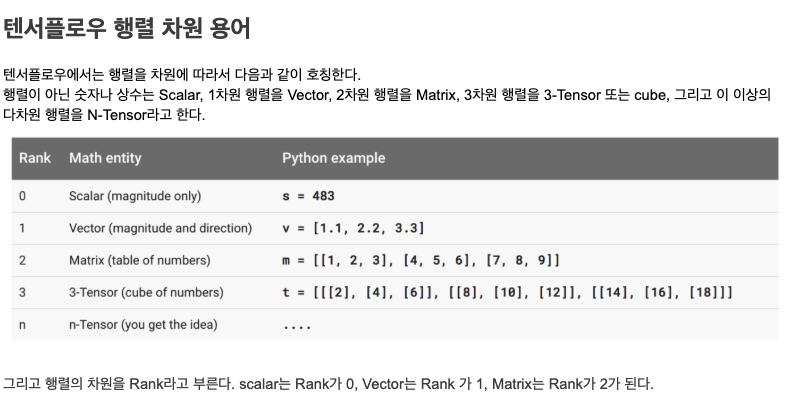

In [9]:
from IPython.display import Image

Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/텐서용어.png')
# n-Tensor
# 행렬의 차원 Rank -> Demension(차원)

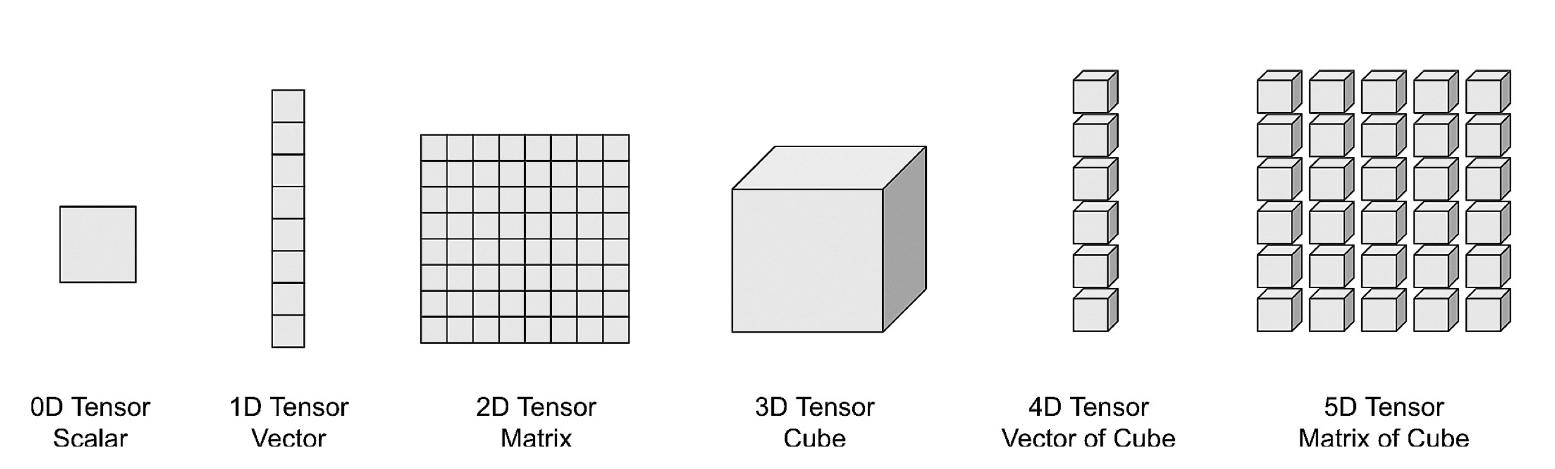

In [10]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/res/tensor_style.jpeg')

## 상수 (Constant)

- 특정 행렬에 초기값 부여시 사용한다

In [11]:
# 1. 플로우를 구성한다 : 데이터가 흘러가는 플로우 구성
# 상수
hello = tf.constant('hello 텐서플로우')
hello
# 상수 하나를 확인하는데 있어서도 part2 작업이 필요하다 (실제로 C++한테 일을 시킨다)

<tf.Tensor 'Const:0' shape=() dtype=string>

In [15]:
# 2. 세션 오픈 -> 데이터 주입 => 실제 연산 수행 -> 결과를 돌려 받는다 => 세션 닫기
# 2-1. 세션 오픈
sess = tf.Session()

In [16]:
# 2-2. 데이터 주입
# 2-3. 연산 수행, 결과를 돌려 받는다
result = sess.run( hello )

In [17]:
# 2-4. 세션 닫기
sess.close()
# 2-5. 결과 확인
result

b'hello \xed\x85\x90\xec\x84\x9c\xed\x94\x8c\xeb\xa1\x9c\xec\x9a\xb0'

## 연산

In [18]:
# part 1. 데이터 플로우 구성
a = tf.constant( 123 )
b = tf.constant( 600 )
a, b
# 텐서의 이름을 별도로 지정하지 않으면 자동으로 부여되고, 넘버링 된다

(<tf.Tensor 'Const_1:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_2:0' shape=() dtype=int32>)

In [19]:
# 계산식
add_opration = a + b
add_opration
# add_opration이 모든 상수 a, b와 관계를 가진다
# 실제 구동시 add_opration을 사용하면 a와 b도 다 접근이 된다

<tf.Tensor 'add:0' shape=() dtype=int32>

In [20]:
# part 2. 실제 수행
with tf.Session() as sess:
  print( sess.run( add_opration ) )

723


## 변수 (Variable)

In [21]:
# part 1 : 데이터 플로우 그래프 구성 (네트워크 구성)
a = tf.constant( 100, name='a' )
b = tf.constant( 200, name='b' )
c = tf.constant( 300, name='c' )
a, b, c
# 텐서의 이름이 지정한대로 구성되었다 

(<tf.Tensor 'a:0' shape=() dtype=int32>,
 <tf.Tensor 'b:0' shape=() dtype=int32>,
 <tf.Tensor 'c:0' shape=() dtype=int32>)

In [22]:
# 변수 준비 : 값이 들어가는(세팅되는) 공간 
# 값이 바뀔수 있다
v = tf.Variable( 0, name='v' )
v

<tf.Variable 'v:0' shape=() dtype=int32_ref>

In [23]:
# 연산식, 계산식 => 사용하는 상수들간의 관계 
add_opr = a + b + c
add_opr

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [25]:
# 데이터 플로우 그래프
# a + b + c => v에게 대입해라
assign_opr = tf.assign( v, add_opr )
assign_opr
# 상수 3개, 연산 1개와 변수 1개간의 관계를 정의했다 

<tf.Tensor 'Assign_1:0' shape=() dtype=int32_ref>

In [26]:
# part2 실제 수행
with tf.Session() as sess:
  # 실제 수행시에는 모든 요소들이 연결될 최종 요소를 넣어서 수행한다
  print( sess.run( assign_opr ) )

600


## 플레이스 홀더 (데이터를 받는 그릇: PlaceHolder)

- 데이터를 주입할때 그 대상이 되는 요소
- 훈련시 훈련용 데이터를 주입하게 되는데 이때 이 데이터를 받아주는 용기역활을 담당
- 주입된 데이터와 플레이스 홀더의 shape이 일치해야 한다
- 종류
  - 고정 크기 플레이스 홀더
  - 가변 크기 플레이스 홀더

### 고정 크기 플레이스 홀더

In [27]:
# part1 : 데이터 플로우 그래프 구성
a = tf.placeholder( tf.int32, shape=(3) )
# 1차원, vector, 구성원 3개인 텐서
a

<tf.Tensor 'Placeholder:0' shape=(3,) dtype=int32>

In [28]:
# 상수
b = tf.constant( 2 )
# 0차원, scalar
b

<tf.Tensor 'Const_3:0' shape=() dtype=int32>

In [29]:
# 데이터 플로우 그래프 
# x_opr = (백터 + 스칼라)
x_opr = a + b
x_opr

<tf.Tensor 'add_3:0' shape=(3,) dtype=int32>

In [32]:
# part2 : 실제 수행
with tf.Session() as sess:
  # 데이터를 주입하고 (Placeholder가 그래프 상에 존재하면, 무조건) -> 수행한다
  # feed_dict의 값은 dict 형태로 제공
  # 키:변수명, 값:주입할 데이터이면서 shape이 맞아야 한다 
  print( sess.run( x_opr, feed_dict={ a:[1,2,3] } ) )
  print( sess.run( x_opr, feed_dict={ a:[10,100,1000] } ) )
  print( sess.run( x_opr, feed_dict={ a:[9,10,11] } ) )

[3 4 5]
[  12  102 1002]
[11 12 13]


### 가변 크기 플레이스 홀더

- 실제적인 딥러닝 학습시 사용되는 형태
- 훈련데이터의 형태는 고정이지만, 데이터의 개수는 다양하기 때문이다
  - 데이터의 개수를 모르겠다 => None으로 표현

In [33]:
# part1 데이터 플로우 그래프 구성
# 데이터가 몇개가 올지 모르겟다
# (None, 10), (None, 2, 5)
a = tf.placeholder( tf.int32, shape=(None) )
b = tf.constant( 2 )
x_opr = a + b
# part2 데이터를 주입하고, 수행
with tf.Session() as sess:
  print( sess.run( x_opr, feed_dict={ a:[1,2,3] } ) )
  print( sess.run( x_opr, feed_dict={ a:[10,100,1000, 10000, 2, 4] } ) )
  print( sess.run( x_opr, feed_dict={ a:[9] } ) )

[3 4 5]
[   12   102  1002 10002     4     6]
[11]


## 데이터 플로우 그래프 (Data Flow Graph)

- 실제 딥러닝에서는 특정 네트워크 자체를 의미한다 
- 즉 CNN, RNN, 등등 네트워크를 구성한 그래프

# Define By Run
- 정의하는데서 바로 데이터를 주입하여 실행

In [34]:
sess = tf.InteractiveSession()

In [35]:
m1 = tf.constant( [ [1,2], [3,4] ])
m1

<tf.Tensor 'Const_5:0' shape=(2, 2) dtype=int32>

In [36]:
m2 = tf.constant( [ [100], [101] ])
m2

<tf.Tensor 'Const_6:0' shape=(2, 1) dtype=int32>

In [37]:
# (2 , 2)*(2, 1) => (2, 1)
tf.matmul( m1,m2 ).eval()

array([[302],
       [704]], dtype=int32)